In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path ="C:\\Users\\gonca\\Downloads\\Heart_failure\\heart.csv"
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [144]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
X = df[["Age"]]
Y = df[["MaxHR"]]
lm1 = LinearRegression()
lm1.fit(X,Y)
lm1.coef_
lm1.intercept_

array([191.99020375])

C:\Users\gonca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 209.19135724917882)

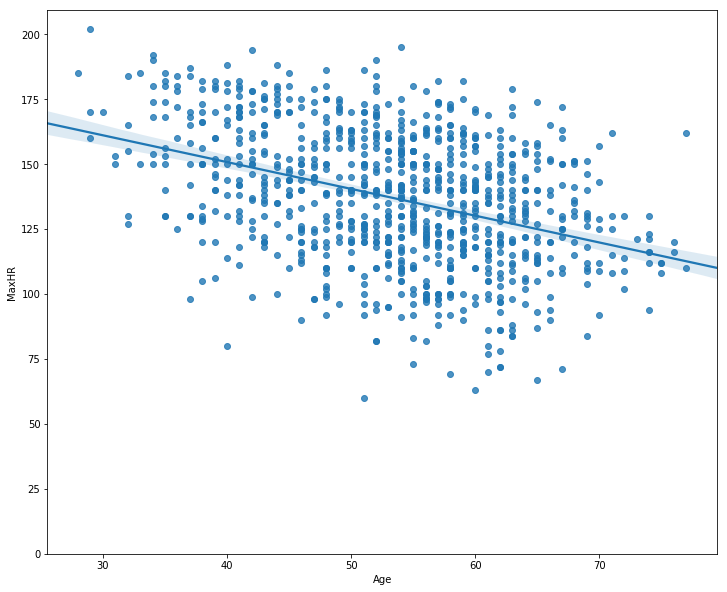

In [146]:
import seaborn as sns
%matplotlib inline 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Age", y="MaxHR", data=df)
plt.ylim(0,)

In [147]:
dummy_RestingECG = pd.get_dummies(df['RestingECG'])
dummy_RestingECG.head()

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [148]:
dummy_ExerciseAngina= pd.get_dummies(df['ExerciseAngina'])
dummy_ExerciseAngina.head()

,N,Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [149]:
dummy_ST_Slope= pd.get_dummies(df['ST_Slope'])
dummy_ST_Slope.head()

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [150]:
dummy_ChestPainType= pd.get_dummies(df['ChestPainType'])
dummy_ChestPainType.head()

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [151]:
dummy_Sex= pd.get_dummies(df['Sex'])
dummy_Sex.head()

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [152]:
df = pd.concat([df, dummy_ST_Slope], axis=1)
df = pd.concat([df, dummy_ExerciseAngina], axis=1)
df = pd.concat([df, dummy_RestingECG], axis=1)
df = pd.concat([df, dummy_ChestPainType], axis=1)
df = pd.concat([df, dummy_Sex], axis=1)

df = df.loc[:,~df.columns.duplicated()]

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,Y,LVH,Normal,ST,ASY,ATA,NAP,TA,F,M
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,1,0,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,0,0,1,0,0,0,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,1,0,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,1,0,1,0,1,0,0,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,0,0,1,0,0,0,1,0,0,1


In [153]:
from sklearn.preprocessing import PolynomialFeatures

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(1, 100, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for MaxHR ~ Age')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('Age')
    plt.ylabel(Name)
    plt.ylim(70,200)
    plt.xlim(20,)


    plt.show()
    plt.close()

In [154]:
x = df['Age']
y = df['MaxHR']

z = df[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'FastingBS', 'Oldpeak', 'Down', 'Flat', 'Up', 'LVH', 'Normal', 'ST', 'N','Y', 'ASY', 'ATA', 'NAP', 'TA', 'M', 'F']]

f = np.polyfit(x, y, 20)
p = np.poly1d(f)
print(p)

C:\Users\gonca\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


           20             19             18             17
3.593e-27 x  - 1.844e-24 x  + 3.738e-22 x  - 3.369e-20 x 
              16            15             14             13
 + 4.462e-19 x  + 1.44e-16 x  - 5.455e-15 x  - 6.469e-13 x 
              12             11             10             9
 + 3.474e-11 x  + 2.941e-09 x  - 2.169e-07 x  - 1.083e-05 x
             8             7         6         5             4
 + 0.001387 x - 5.259e-05 x - 6.769 x + 504.4 x - 1.977e+04 x
              3             2
 + 4.792e+05 x - 7.242e+06 x + 6.304e+07 x - 2.426e+08


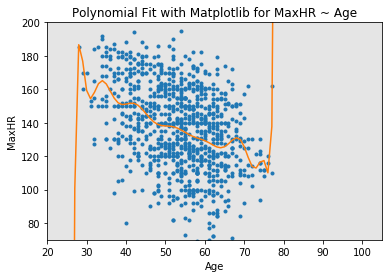

In [155]:
PlotPolly(p, x, y, 'MaxHR')

In [156]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Down,Flat,Up,...,Y,LVH,Normal,ST,ASY,ATA,NAP,TA,F,M
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.138397,0.185568,-0.258067,...,0.215793,0.145727,-0.230566,0.136798,0.166607,-0.218165,-0.011335,0.032042,-0.055750,0.055750
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.007912,0.099207,-0.096146,...,0.155101,0.053166,-0.116851,0.090447,0.048824,-0.046153,-0.041348,0.049855,-0.005133,0.005133
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.083371,-0.050953,0.094027,...,-0.034166,0.177077,-0.038470,-0.133106,-0.120531,0.150954,-0.006634,0.017365,0.200092,-0.200092
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.105102,0.107006,-0.161730,...,0.060451,-0.011656,-0.093028,0.127110,0.131176,-0.140514,-0.039249,0.026885,-0.120076,0.120076
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.073316,-0.342581,0.383397,...,-0.370425,0.125793,0.023801,-0.157879,-0.354963,0.253735,0.134580,0.100025,0.189186,-0.189186
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.322130,0.283295,-0.450577,...,0.408752,0.086794,-0.116719,0.055958,0.280026,-0.262124,-0.106212,0.032231,-0.105734,0.105734
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.122527,0.554134,-0.622164,...,0.494282,0.010670,-0.091580,0.102527,0.516716,-0.401924,-0.212964,-0.054790,-0.305445,0.305445
Down,0.138397,-0.007912,-0.083371,0.105102,-0.073316,0.322130,0.122527,1.000000,-0.272040,-0.235904,...,0.136439,0.043755,-0.060564,0.030345,0.103407,-0.097754,-0.040816,0.016651,-0.066036,0.066036
Flat,0.185568,0.099207,-0.050953,0.107006,-0.342581,0.283295,0.554134,-0.272040,1.000000,-0.870951,...,0.382237,0.015091,-0.047172,0.043017,0.303645,-0.304667,-0.072031,-0.010486,-0.116077,0.116077
Up,-0.258067,-0.096146,0.094027,-0.161730,0.383397,-0.450577,-0.622164,-0.235904,-0.870951,1.000000,...,-0.455676,-0.037582,0.078563,-0.058936,-0.359443,0.357588,0.093583,0.002087,0.150942,-0.150942


In [157]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [158]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [159]:
Z_pr=pr.fit_transform(z)

In [160]:
z.shape

(918, 20)

In [161]:
Z_pr.shape

(918, 231)

In [162]:
lm.fit(z, df['HeartDisease'])
# Find the R^2
print('The R-square is: ', lm.score(z, df['HeartDisease']))

The R-square is:  0.5757101767807937


In [163]:
Yhat = lm.predict(z)
mse = mean_squared_error(df['HeartDisease'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  0.10486361416085964


In [164]:
lm.fit(df[['Oldpeak']], df[['HeartDisease']])
lm.score(df[['Oldpeak']], df[['HeartDisease']])

0.1631761858551274

In [165]:
Yhat = lm.predict(df[['Oldpeak']])
mse = mean_squared_error(df['HeartDisease'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  0.20682176372109262


In [166]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.1610813231895557


In [167]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Max Heart Rate')
    plt.ylabel('Proportion of observations')

    plt.show()
    plt.close()

In [168]:
y_data = df['MaxHR']
x_data = df.drop('MaxHR', axis =1)

In [169]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 138
number of training samples: 780


In [170]:
lr = LinearRegression()
lr.fit(x_train[['Age', 'Cholesterol', 'RestingBP','FastingBS', 'Oldpeak', 'Down', 'Flat', 'Up', 'LVH', 'Normal', 'ST', 'N','Y', 'ASY', 'ATA', 'NAP', 'TA', 'M', 'F']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [171]:
yhat_train = lr.predict(x_train[['Age', 'Cholesterol', 'RestingBP','FastingBS', 'Oldpeak', 'Down', 'Flat', 'Up', 'LVH', 'Normal', 'ST', 'N','Y', 'ASY', 'ATA', 'NAP', 'TA', 'M', 'F']])
yhat_train[0:5]

array([148.01170107, 124.70917197, 112.45402172, 148.91056316,
       148.92514462])

In [172]:
yhat_test = lr.predict(x_test[['Age', 'Cholesterol', 'RestingBP','FastingBS', 'Oldpeak', 'Down', 'Flat', 'Up', 'LVH', 'Normal', 'ST', 'N','Y', 'ASY', 'ATA', 'NAP', 'TA', 'M', 'F']])
yhat_test[0:5]

array([140.35026912, 122.40954883, 133.93762018, 121.90822291,
       111.49200187])

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\gonca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


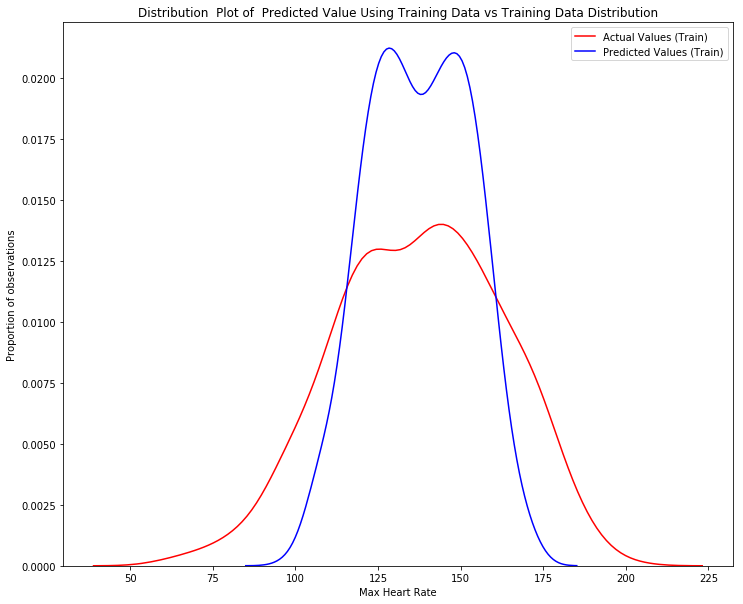

In [174]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

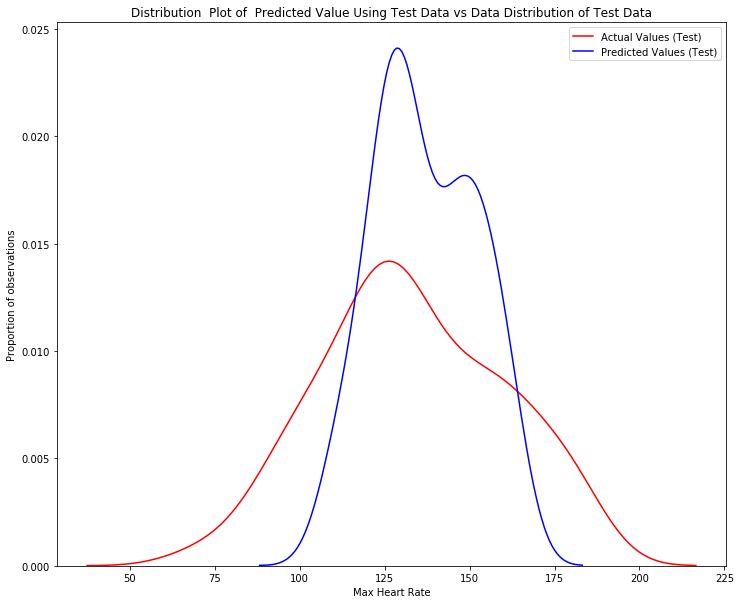

In [175]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [176]:
from sklearn.preprocessing import PolynomialFeatures

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [178]:
pr = PolynomialFeatures(degree=1)
x_train_pr = pr.fit_transform(x_train[['Oldpeak']])
x_test_pr = pr.fit_transform(x_test[['Oldpeak']])
p

poly1d([ 3.59307371e-27, -1.84370379e-24,  3.73751844e-22, -3.36906584e-20,
        4.46237578e-19,  1.44004751e-16, -5.45474574e-15, -6.46866714e-13,
        3.47406676e-11,  2.94117261e-09, -2.16946906e-07, -1.08343708e-05,
        1.38731006e-03, -5.25862864e-05, -6.76869912e+00,  5.04373550e+02,
       -1.97741314e+04,  4.79150947e+05, -7.24208212e+06,  6.30433668e+07,
       -2.42648258e+08])

In [179]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
poly.score(x_train_pr, y_train)

0.04243616730684863

Text(3, 0.75, 'Maximum R^2 ')

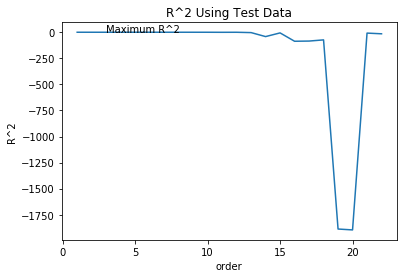

In [181]:
Rsqu_test = []

order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14, 15, 16, 17, 18, 19, 20, 21, 22]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Oldpeak']])
    
    x_test_pr = pr.fit_transform(x_test[['Oldpeak']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [183]:
x_train_scaled = scaler.fit_transform(x_train_pr)
x_test_scaled = scaler.transform(x_test_pr)

In [184]:
from sklearn.linear_model import Ridge

In [185]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['Age', 'Cholesterol', 'RestingBP','FastingBS', 'Oldpeak', 'Down', 'Flat', 'Up', 'LVH', 'Normal', 'ST', 'N','Y', 'ASY', 'ATA', 'NAP', 'TA', 'M', 'F']])
x_test_pr=pr.fit_transform(x_test[['Age', 'Cholesterol', 'RestingBP','FastingBS', 'Oldpeak', 'Down', 'Flat', 'Up', 'LVH', 'Normal', 'ST', 'N','Y', 'ASY', 'ATA', 'NAP', 'TA', 'M', 'F']])

In [186]:
RigeModel=Ridge(alpha=1)

In [187]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [188]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,10))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)



  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                      | 0/10 [00:00<?, ?it/s, Test Score=0.128, Train Score=0.477]

  0%|                                                       | 0/10 [00:00<?, ?it/s, Test Score=0.25, Train Score=0.497]

  0%|                                                      | 0/10 [00:00<?, ?it/s, Test Score=0.262, Train Score=0.485]

  0%|                                                      | 0/10 [00:00<?, ?it/s, Test Score=0.267, Train Score=0.477]

  0%|                                                       | 0/10 [00:00<?, ?it/s, Test Score=0.27, Train Score=0.472]

  0%|                                                      | 0/10 [00:00<?, ?it/s, Test Score=0.271, Train Score=0.468]

  0%|                                                      | 0/10 [00:00<?, ?it/s, Test Score=0.272, Train Score=0.464]

  0%|                         

In [189]:
LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

NameError: name 'LogisticRegression' is not defined